# Colour Threshold, Green Screen
Colour threshold independent practice by Mikaela Sanchez
### Import resources

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Read and display image with green screen

Shape of image:  (450, 660, 3)


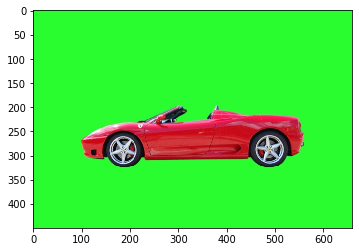

In [4]:
car_image = cv2.imread('images/car_green_screen.jpg')
car_image = cv2.cvtColor(car_image, cv2.COLOR_BGR2RGB)

print('Shape of image: ', car_image.shape)
plt.imshow(car_image)

### Define colour threshold and create the mask

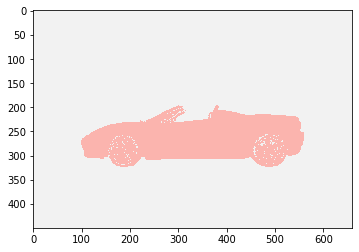

In [11]:
lower_bound = np.array([0, 50, 0])
upper_bound = np.array([100, 255, 100])

mask = cv2.inRange(car_image, upperb=upper_bound, lowerb=lower_bound)
plt.imshow(mask, cmap='Pastel1')

### Cropping the car and background

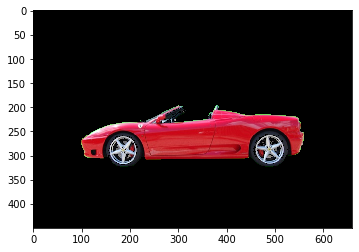

In [14]:
cropped_car = car_image.copy()

# Anything white in the mask will be removed in the car image
cropped_car[mask != 0] = [0, 0, 0]

plt.imshow(cropped_car)

#### Space background

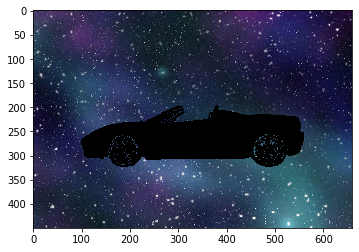

In [23]:
space_bg = cv2.imread('images/space_background.jpg')
cropped_space_bg = cv2.cvtColor(space_bg, cv2.COLOR_BGR2RGB).copy()

# Match car dimensions 
cropped_space_bg = cropped_space_bg[0:450, 0:660]

# Anything black in the mask will be removed in the bg image
cropped_space_bg[mask == 0] = [0, 0, 0]

plt.imshow(cropped_space_bg)

#### Sky background

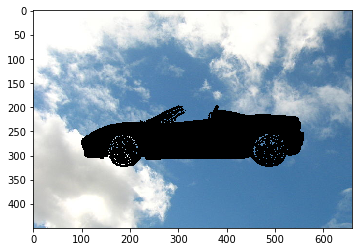

In [24]:
sky_bg = cv2.imread('images/sky.jpg')
cropped_sky_bg = cv2.cvtColor(sky_bg, cv2.COLOR_BGR2RGB).copy()

# Match car dimensions 
cropped_sky_bg = cropped_sky_bg[0:450, 0:660]

# Anything black in the mask will be removed in the bg image
cropped_sky_bg[mask == 0] = [0, 0, 0]

plt.imshow(cropped_sky_bg)

### Put the backgrounds and foreground together

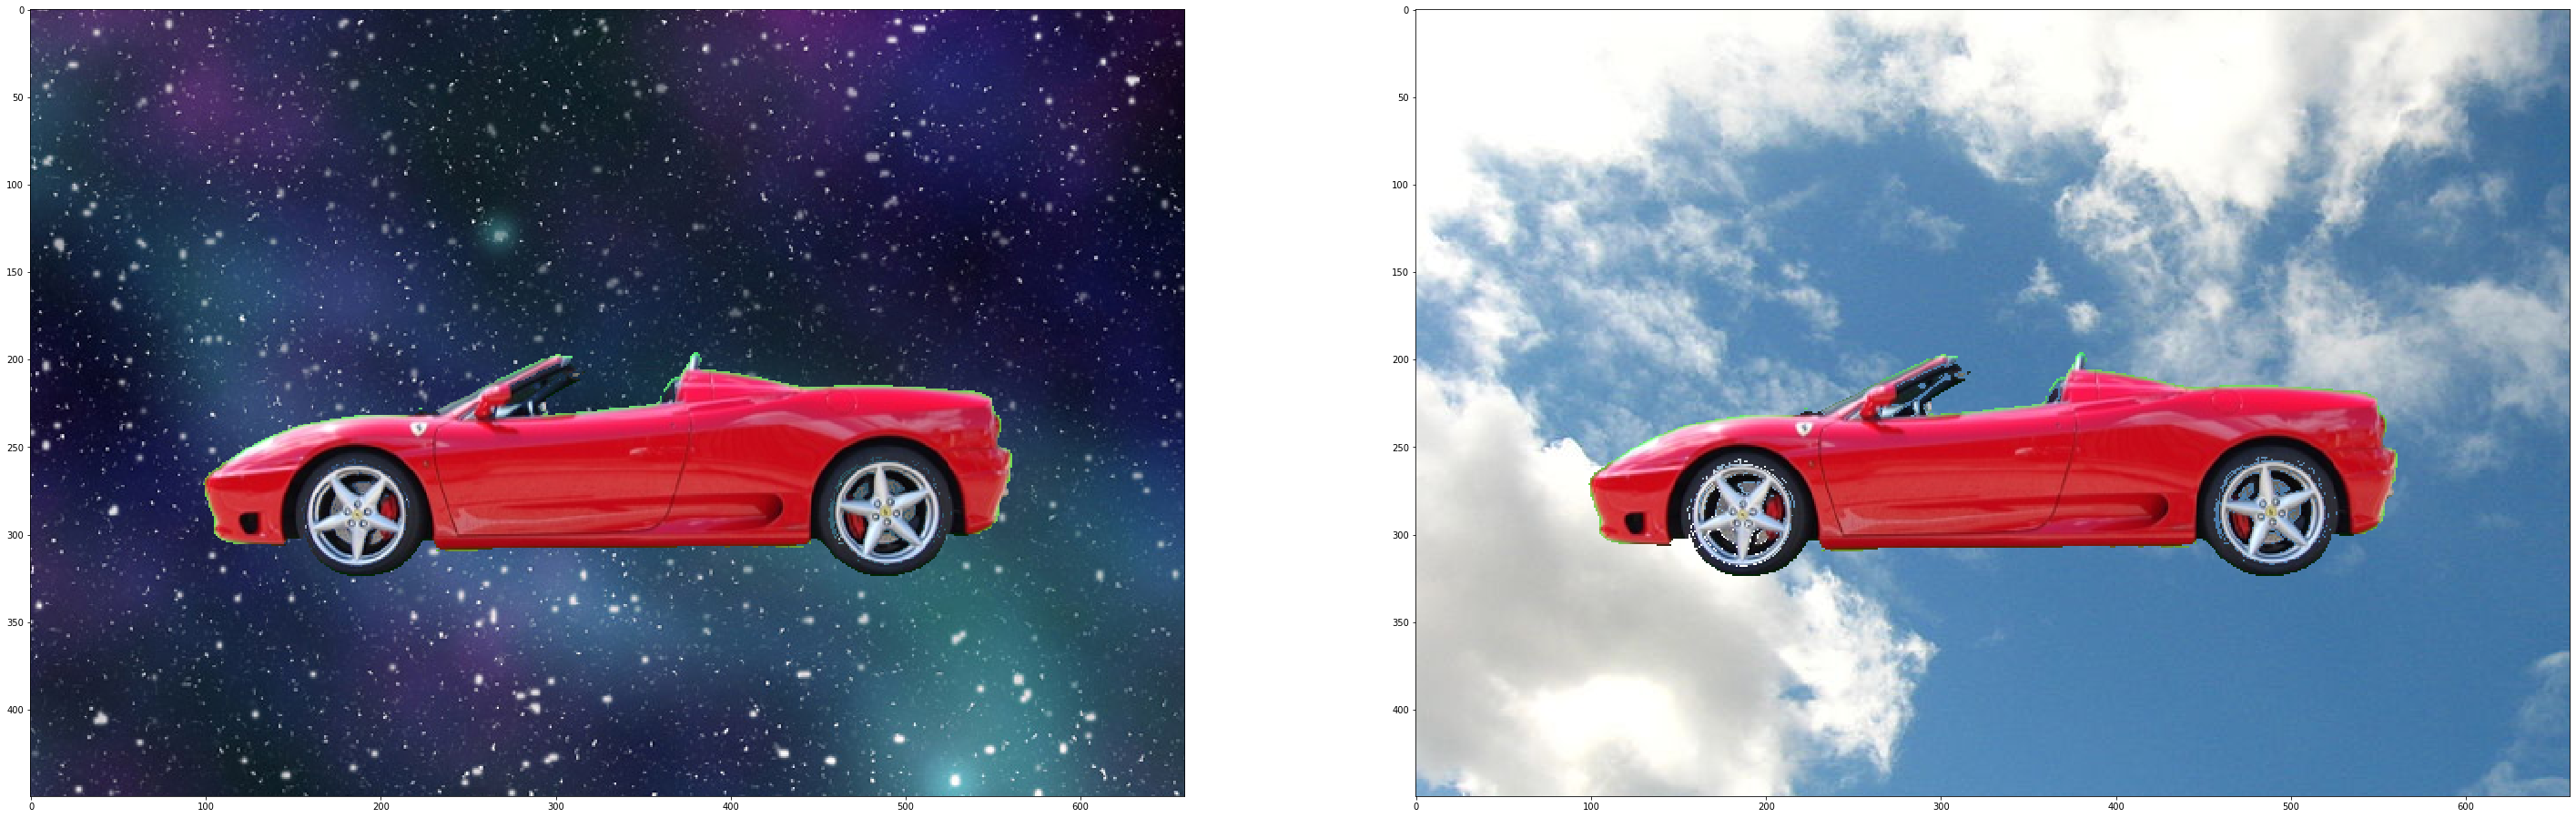

In [27]:
space_car = cropped_space_bg + cropped_car
sky_car = cropped_sky_bg + cropped_car

figure, axis_arr = plt.subplots(1, 2, figsize=(50,100))
axis_arr[0].imshow(space_car)
axis_arr[1].imshow(sky_car)